In [174]:
import pandas as pd 
sales = pd.read_csv('grocery_sales.csv')
sales.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


# EDA

In [175]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   storeID   78 non-null     object 
 1   product   78 non-null     object 
 2   quantity  78 non-null     int64  
 3   revenue   78 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


In [176]:
sales.describe()

,quantity,revenue
count,78.000000,78.000000
mean,1162.923077,4740.384615
std,493.074815,2455.933504
min,284.000000,832.500000
25%,759.250000,2815.275000
50%,1131.500000,3951.900000
75%,1596.500000,7045.475000
max,1931.000000,10211.900000


In [177]:
sales.describe(exclude='number')

,storeID,product
count,78,78
unique,26,3
top,A,Apples
freq,3,26


In [178]:
sales.isna().sum()

storeID     0
product     0
quantity    0
revenue     0
dtype: int64

In [179]:
sales.dtypes

storeID      object
product      object
quantity      int64
revenue     float64
dtype: object

In [180]:
sales['product'].unique()

array(['Apples', 'Bananas', 'Oranges'], dtype=object)

# feature generation 

In [181]:
sales['price'] = sales['revenue']/sales['quantity']

In [182]:
sales

,storeID,product,quantity,revenue,price
0,A,Apples,1811,9300.6,5.135616
1,A,Bananas,1003,3375.2,3.365105
2,A,Oranges,1604,8528.5,5.317020
3,B,Apples,1785,9181.0,5.143417
4,B,Bananas,944,3680.2,3.898517
...,...,...,...,...,...
73,Y,Bananas,902,3169.8,3.514191
74,Y,Oranges,1441,6856.1,4.757876
75,Z,Apples,1441,7209.0,5.002776
76,Z,Bananas,1199,4440.5,3.703503


# encoding categorical cols

In [183]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
sales['storeID'] = l.fit_transform(sales['storeID'])
sales['product'] =  l.fit_transform(sales['product'])                                  

C:\Users\yluja\Documents\adult.csv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


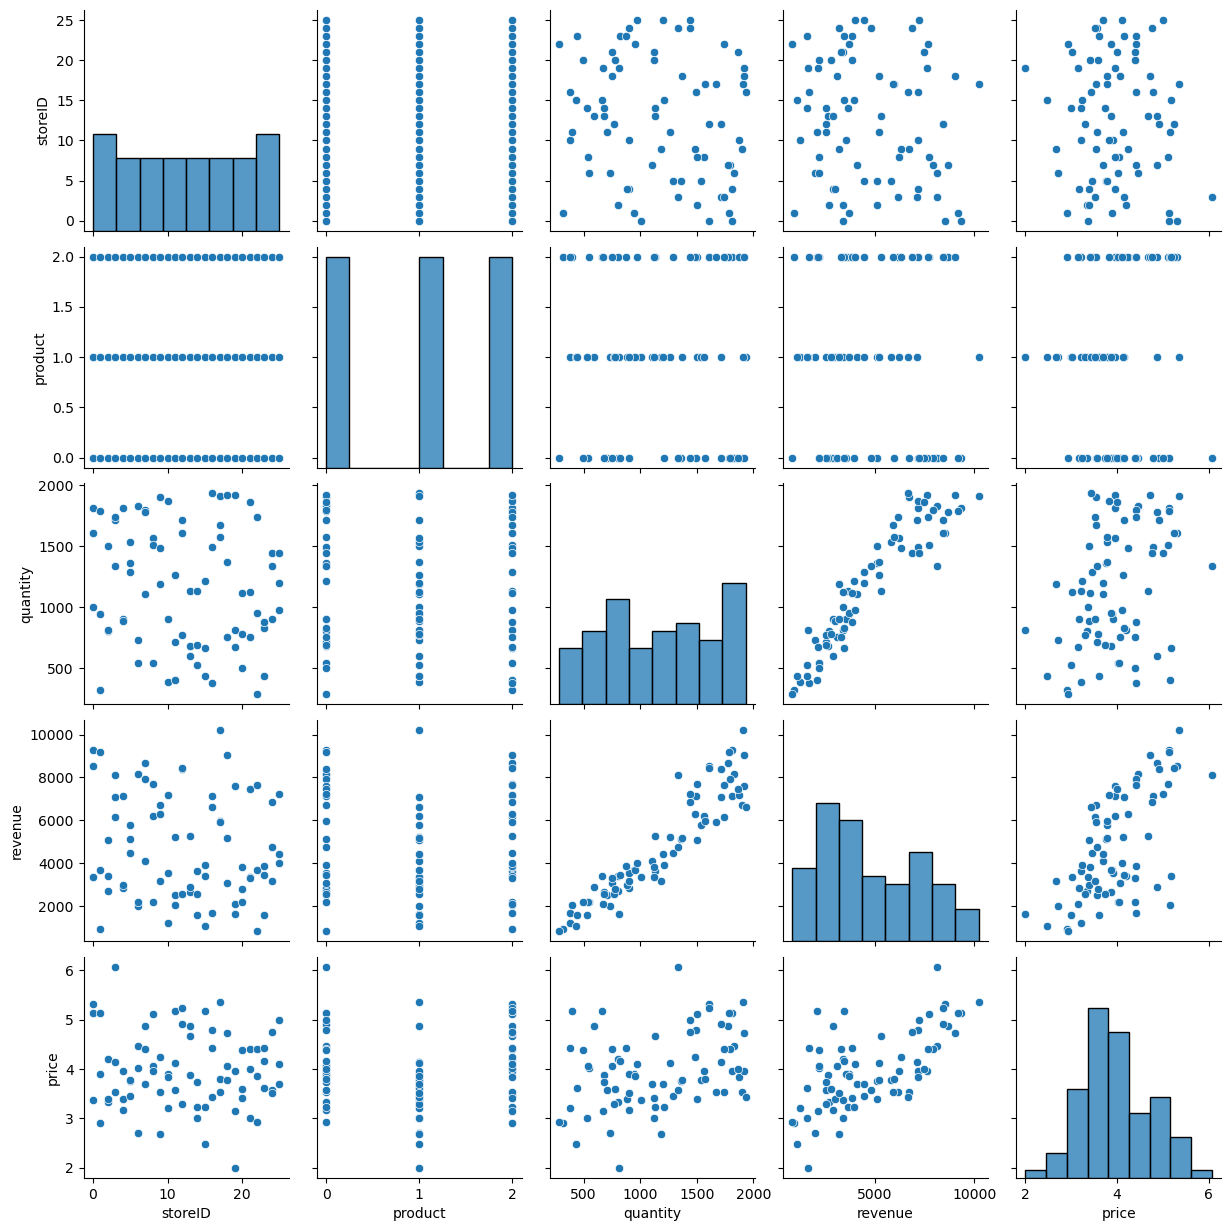

In [184]:
sns.pairplot(sales)

In [198]:
sales.var()

storeID     5.698052e+01
product     6.753247e-01
quantity    2.431228e+05
revenue     6.031609e+06
price       5.880927e-01
dtype: float64

# dependent and independent variables 

In [186]:
X = sales.drop('revenue',axis=1)
y = sales['revenue']

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)


# Dim reduction 
-  PCA

In [188]:
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
model = LinearRegression()
pca = PCA(n_components=0.9) 
scaler = StandardScaler()
pipe = make_pipeline(scaler,pca,model)

In [192]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('linearregression', LinearRegression())])

In [193]:
test_acc = pipe.score(X_test,y_test )

In [194]:
train_acc = pipe.score(X_train,y_train)

In [204]:
print(f'{train_acc:.1%} test set accuracy')
print(f'{test_acc:.1%} test set accuracy')

98.0% test set accuracy
96.9% test set accuracy
